In [185]:
# pip install
#!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pprint import pprint
import copy

# Module imports
from periodic_table import *
from utils import json_to_file, file_to_json
print("Imported all.")

Imported all.


In [186]:
file_dir = "./assets/data.txt"
columns = ["Atomic Number", "Mass Number", "Counts"]
# Add data to DataFrame
df = pd.DataFrame(columns=columns)
# Reads in data to df
with open(file_dir, "r") as f:
    for line in f:
        stripped_line = line.strip()
        data = list(map(int, stripped_line.split(",")))
        df.loc[len(df)]= data
# Sorts to atomic number
df = df.sort_values(by=["Atomic Number", "Mass Number"])
# Gets rid of any duplicates
df.head(10)

,Atomic Number,Mass Number,Counts
0,1,4,2058
1,1,5,6
2,1,6,6
3,2,5,27
4,2,6,3893
5,2,7,61
6,2,8,90
7,2,9,9
8,2,10,1
9,3,4,26


In [187]:
def get_decay_mode(data):
    info = ""
    for item in data.items():
        if item[0] is not None:
            info += item[0] + ", "
    info = info[:-2]
    return info

In [188]:
# Add in isotope data
df['Symbol'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["symbol"], axis=1)
df['Iso Symbol'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["symbol"] + " " + str(x['Atomic Number']) + "-" + str(x['Mass Number']), axis=1)
df['Stable'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["stable"], axis=1)
df['Half Life'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["half-life"], axis=1)
df['Decay Modes'] = df.apply(lambda x: get_decay_mode(nuc(x['Atomic Number'], x['Mass Number'])["decay modes"]), axis=1)
df['Plot Colour'] = df.apply(lambda x: "blue" if x['Stable'] else "red", axis=1)
df

,Atomic Number,Mass Number,Counts,Symbol,Iso Symbol,Stable,Half Life,Decay Modes,Plot Colour
0,1,4,2058,H,H 1-4,False,0.000000e+00,N,red
1,1,5,6,H,H 1-5,False,8.330000e-23,2N,red
2,1,6,6,H,H 1-6,False,2.970000e-22,N,red
3,2,5,27,He,He 2-5,False,7.910000e-22,"A, N",red
4,2,6,3893,He,He 2-6,False,8.010000e-01,B-,red
...,...,...,...,...,...,...,...,...,...
184,20,45,1,Ca,Ca 20-45,False,1.400000e+07,B-,red
185,21,43,1,Sc,Sc 21-43,False,1.400000e+04,EC,red
186,21,44,1,Sc,Sc 21-44,False,1.430000e+04,EC,red
187,21,45,3,Sc,Sc 21-45,True,inf,,blue


C:\Users\TSBus\AppData\Local\Temp\ipykernel_26604\3257956181.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df["Iso Symbol"])


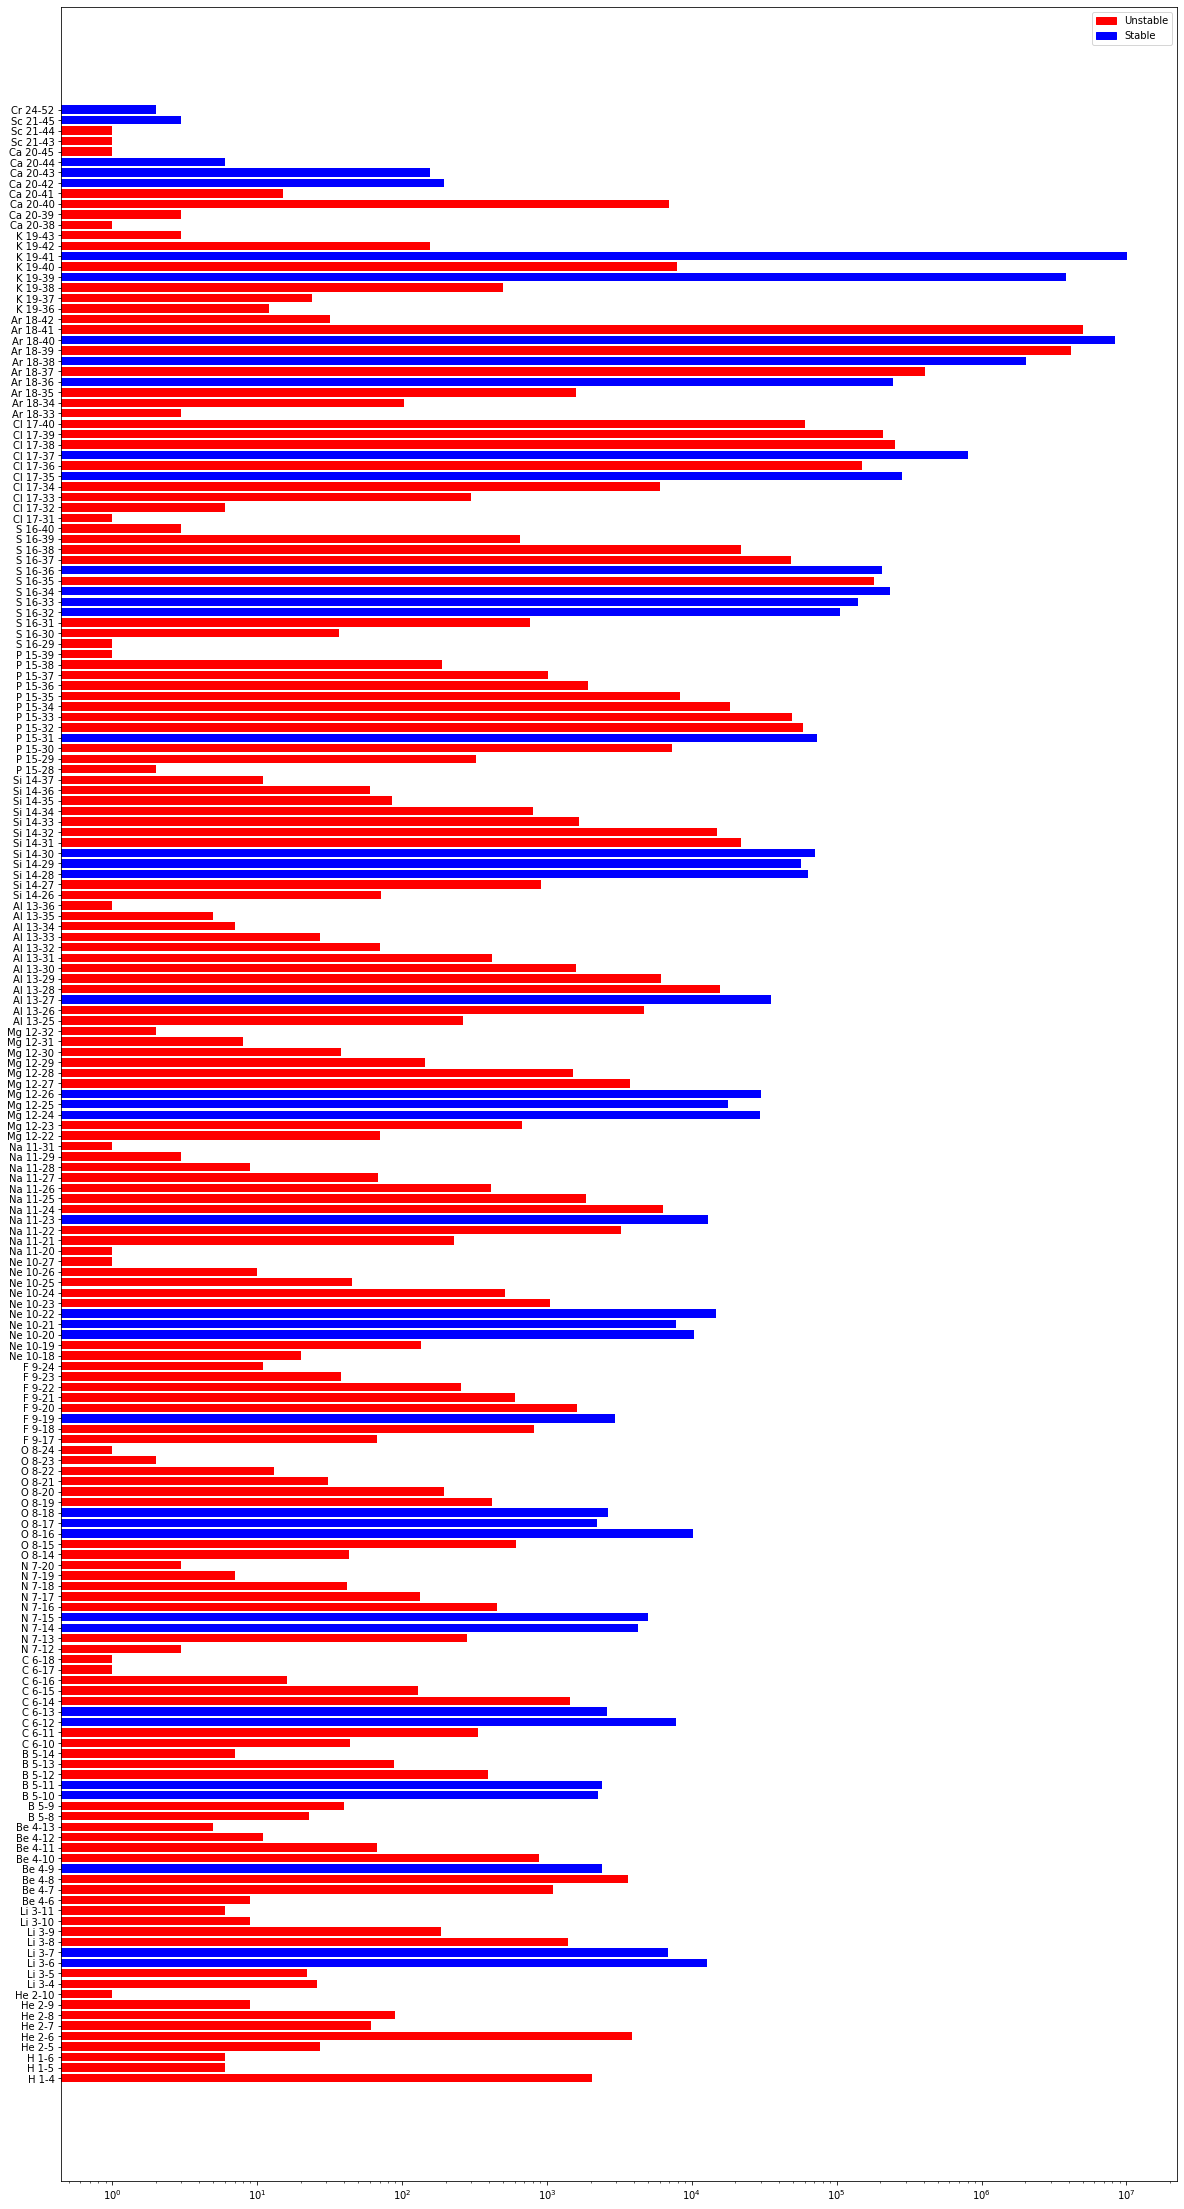

In [189]:
# Plot histogram
figsize=(20,40)
# Plotting
fig, ax = plt.subplots(figsize=figsize)
ax.barh(df.index, df["Counts"], log=True, color=df["Plot Colour"])
ax.set_yticklabels(df["Iso Symbol"])
ax.set_yticks(np.arange(len(df)))
red_patch = mpatches.Patch(color="red", label="Unstable")
blue_patch = mpatches.Patch(color="blue", label="Stable")
ax.legend(handles=[red_patch, blue_patch], loc=0)
plt.show()

In [190]:
# Clean unstable isotopes into two datasets
df_unstable = df[df["Stable"] == False]
df_unstable = df_unstable.reset_index()
df_stable = df[df["Stable"] == True]
df_stable = df_stable.reset_index()
print(f"Number of stable isotopes: {len(df) - len(df_unstable)}")
print(f"Number of unstable isotopes: {len(df_unstable)}")
df_unstable, df_stable

Number of stable isotopes: 41
Number of unstable isotopes: 148


(     index  Atomic Number  Mass Number  Counts Symbol Iso Symbol  Stable  \
 0        0              1            4    2058      H      H 1-4   False   
 1        1              1            5       6      H      H 1-5   False   
 2        2              1            6       6      H      H 1-6   False   
 3        3              2            5      27     He     He 2-5   False   
 4        4              2            6    3893     He     He 2-6   False   
 ..     ...            ...          ...     ...    ...        ...     ...   
 143    179             20           40    7011     Ca   Ca 20-40   False   
 144    180             20           41      15     Ca   Ca 20-41   False   
 145    184             20           45       1     Ca   Ca 20-45   False   
 146    185             21           43       1     Sc   Sc 21-43   False   
 147    186             21           44       1     Sc   Sc 21-44   False   
 
         Half Life Decay Modes Plot Colour  
 0    0.000000e+00           

C:\Users\TSBus\AppData\Local\Temp\ipykernel_26604\176413712.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_un.set_yticklabels(df_unstable["Iso Symbol"])


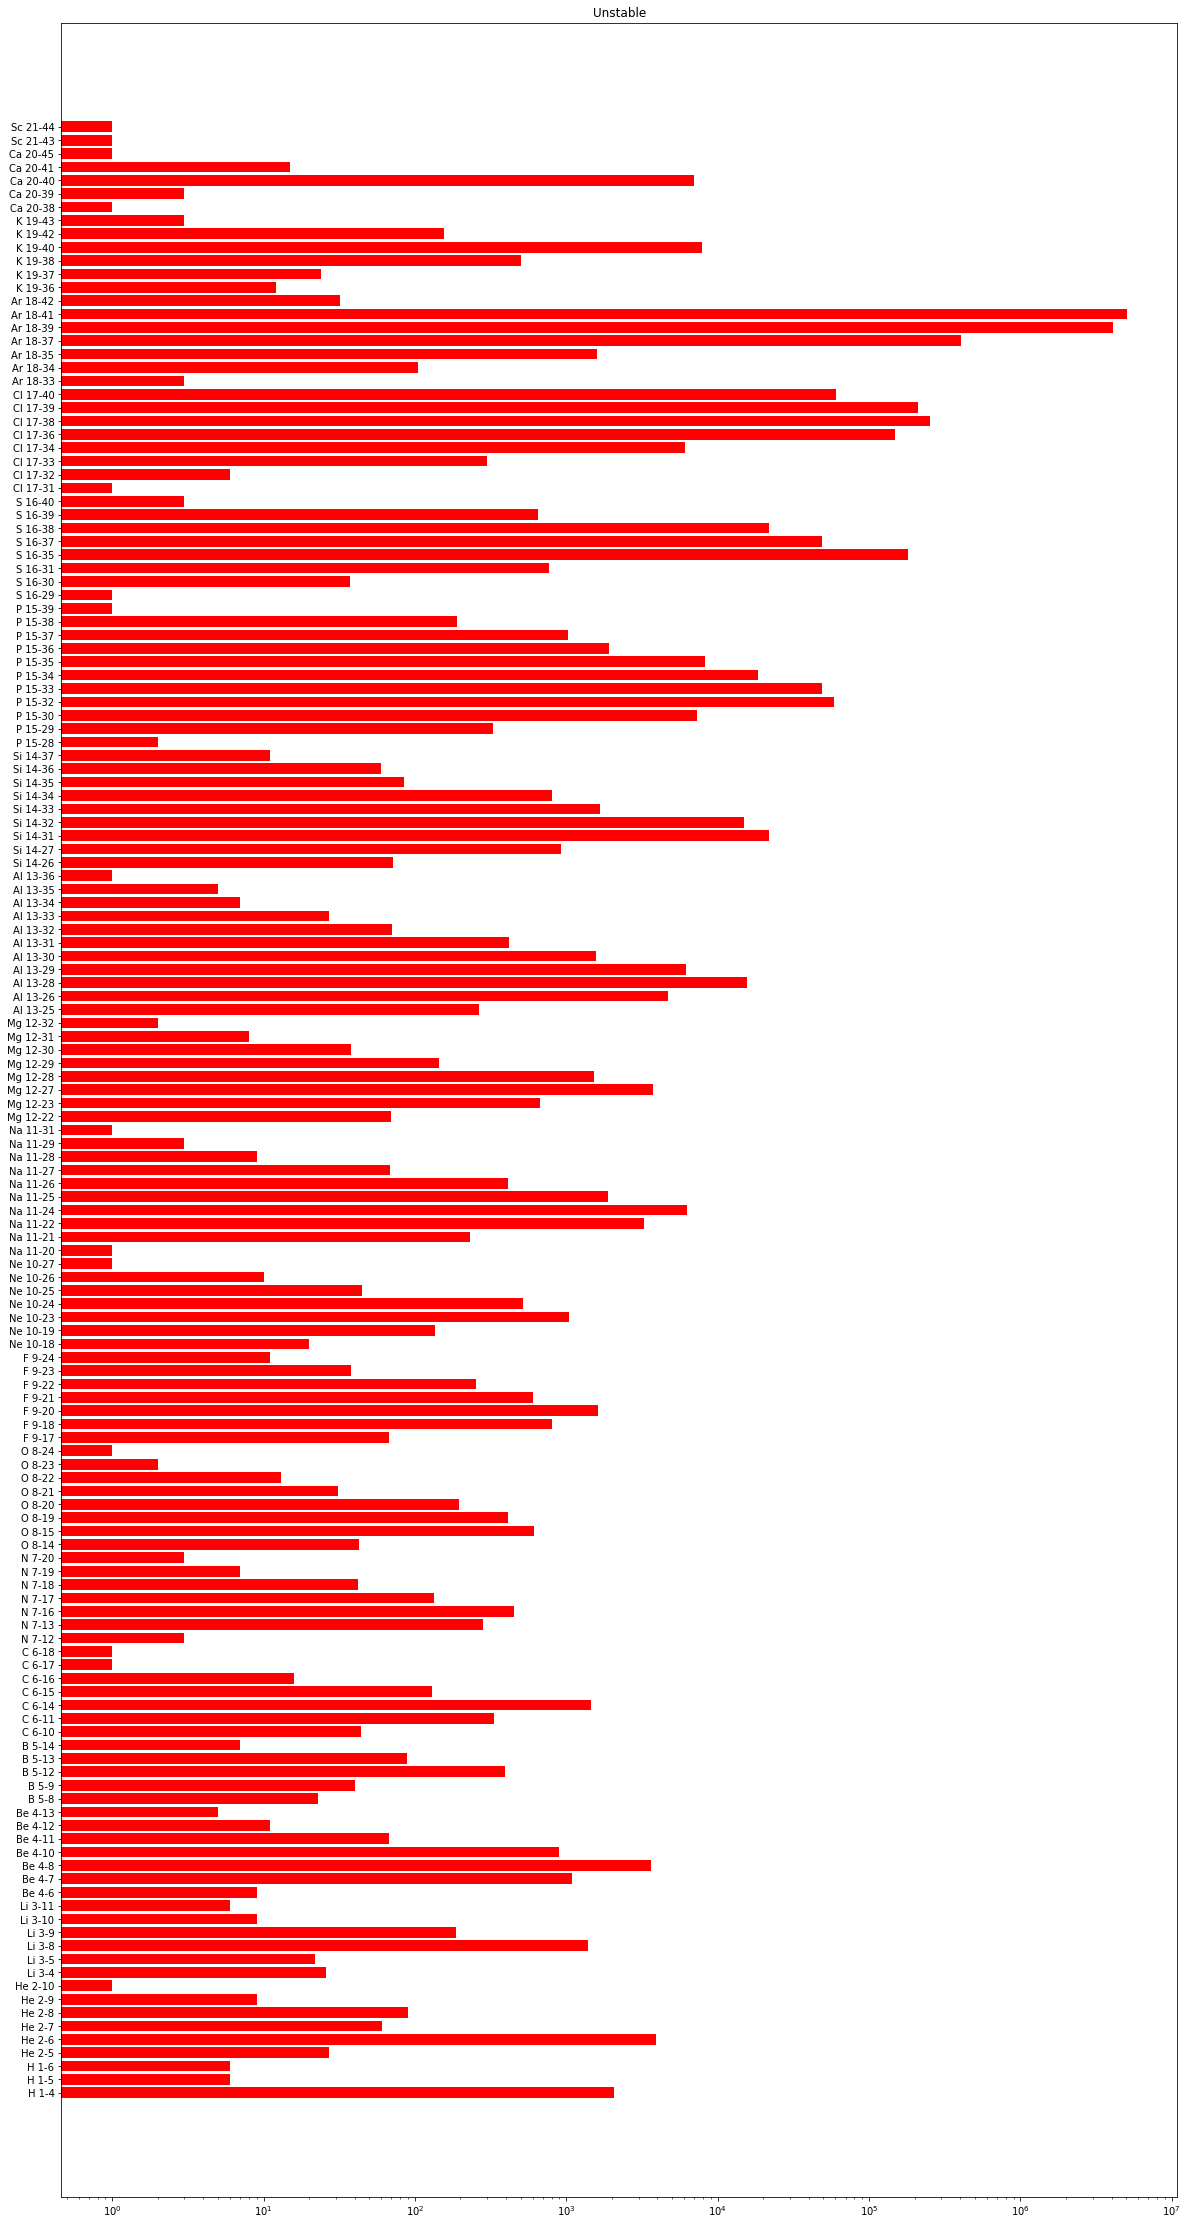

In [191]:
# Plot unstable
fig_un, ax_un = plt.subplots(figsize=figsize)
ax_un.barh(df_unstable.index, df_unstable["Counts"], log=True, color=df_unstable["Plot Colour"])
ax_un.set_yticklabels(df_unstable["Iso Symbol"])
ax_un.set_yticks(np.arange(len(df_unstable)))
ax_un.set_title("Unstable")
plt.show()

C:\Users\TSBus\AppData\Local\Temp\ipykernel_26604\4235715884.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_s.set_yticklabels(df_stable["Iso Symbol"])


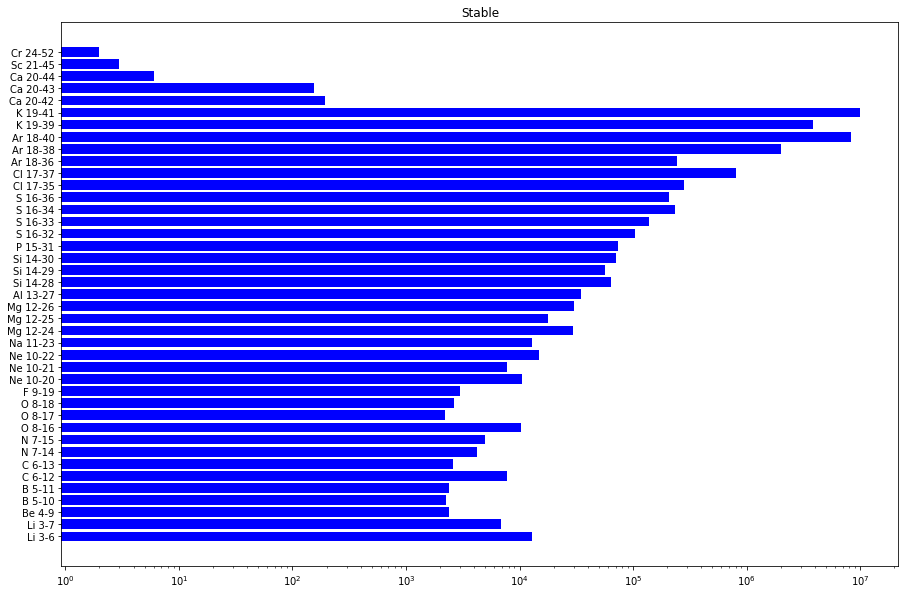

In [192]:
# Plot stable
fig_s, ax_s = plt.subplots(figsize=(15,10))
ax_s.barh(df_stable.index, df_stable["Counts"], log=True, color=df_stable["Plot Colour"])
ax_s.set_yticklabels(df_stable["Iso Symbol"])
ax_s.set_yticks(np.arange(len(df_stable)))
ax_s.set_title("Stable")
plt.show()